In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
#from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.4.1


In [2]:
batch_size = 23

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("img/train/",
                                                 target_size=(48,48),
                                                 color_mode="rgb",
                                                  batch_size=22,
                                                 class_mode='categorical',
                                                 shuffle=True)

datagen_test = ImageDataGenerator(horizontal_flip=True)
test_generator=datagen_test.flow_from_directory("img/test/",
                                                 target_size=(48,48),
                                                 color_mode="rgb",
                                                 batch_size=3,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 66 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [3]:
model= Sequential()

model.add(Conv2D(64,(3,3), padding="same", input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(3, activation="softmax"))


opt=Adam(lr=0.0005)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [4]:
epochs=100
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps= test_generator.n//test_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00005)
callbacks=[PlotLossesCallback(), checkpoint, reduce_lr]
model.save_weights('my_model_weights.h5')
history=model.fit(x=train_generator, 
                 steps_per_epoch=steps_per_epoch,
                 epochs=epochs,
                 validation_data=test_generator,
                 validation_steps=validation_steps)

Epoch 1/100
3/3 [==============================] - 3s 784ms/step - loss: 1.4162 - accuracy: 0.4318 - val_loss: 9.0592 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 2s 601ms/step - loss: 1.0205 - accuracy: 0.5303 - val_loss: 7.8276 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 2s 563ms/step - loss: 1.0318 - accuracy: 0.5890 - val_loss: 9.4037 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 2s 771ms/step - loss: 0.8081 - accuracy: 0.6345 - val_loss: 11.0543 - val_accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 3s 862ms/step - loss: 0.6285 - accuracy: 0.7519 - val_loss: 11.1843 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 3s 857ms/step - loss: 0.5838 - accuracy: 0.7917 - val_loss: 12.4423 - val_accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 3s 823ms/step - loss: 0.7759 - accuracy: 0.6970 - val_loss: 14.3365 - val_accuracy: 0.3333
Epoch 8/1

C:\Users\Lavanya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
C:\Users\Lavanya\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


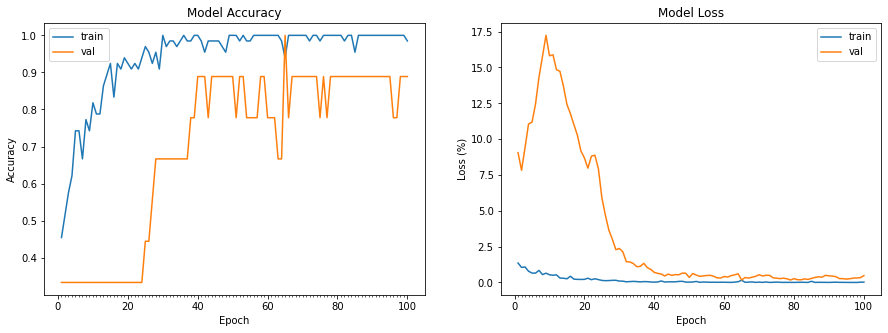

In [5]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(range(1,len(history.history['accuracy'])+1),history.history['accuracy'])
axs[0].plot(range(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(history.history['accuracy'])+1),len(history.history['accuracy'])/10)
axs[0].legend(['train', 'val'], loc='best')
# summarize history for loss
axs[1].plot(range(1,len(history.history['loss'])+1),history.history['loss'])
axs[1].plot(range(1,len(history.history['val_loss'])+1),history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss (%)')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(history.history['loss'])+1),len(history.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
fig.savefig('plot.png')
plt.show()

In [6]:
model_json = model.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)

In [7]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

In [9]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('img/Test/Happy/49.jpg', target_size = (48,48))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.argmax(model.predict(test_image))
print(train_generator.class_indices)
print(result)

Using TensorFlow backend.


{'Happy': 0, 'Sad': 1, 'Surprised': 2}
0


In [10]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('img/Test/Surprised/73.jpg', target_size = (48,48))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.argmax(model.predict(test_image))
print(train_generator.class_indices)
print(result)

{'Happy': 0, 'Sad': 1, 'Surprised': 2}
2


In [11]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('img/Test/Sad/24.jpg', target_size = (48,48))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.argmax(model.predict(test_image))
print(train_generator.class_indices)
print(result)

{'Happy': 0, 'Sad': 1, 'Surprised': 2}
1


In [12]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('output/image.jpg', target_size = (48,48))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.argmax(model.predict(test_image))
print(train_generator.class_indices)
print(result)

{'Happy': 0, 'Sad': 1, 'Surprised': 2}
1


In [13]:
import cv2
frame_width=400
frame_height=400
outputfilename="output_file.mp4"
fourcc =cv2.VideoWriter_fourcc(*'mp4v')
out= cv2.VideoWriter(outputfilename, fourcc, 10, (frame_width, frame_height))

In [14]:
import cv2
import numpy as np

In [15]:
def target_class(pred):
    if(pred==0):
        text='Happy'
    elif(pred==1):
        text='Sad'
    elif(pred==2):
        text='Surprised'
    else:
        text='None'
    return text

In [17]:
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture('video1.mp4')
if(cap.isOpened()==False):
    print("Error in opening video stream or file")
    
img=1
count=0

while True:
    count=count+2
    count=count%10
    ret, image_np=cap.read()
    if(ret==True):
        if(count==2 or count==8 or count==4 or count==6):
            #cv2.imwrite('output/image.jpg', image_np)
            gray_fr = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
            faces = facec.detectMultiScale(gray_fr, 1.3, 5)
            for (x, y, w, h) in faces:
                fc = gray_fr[y:y+h, x:x+w]
                roi = cv2.resize(fc, (48, 48))
                img=image_np[y:y+h,x:x+w]
                cv2.imwrite('output/image.jpg', img)
                img = image.load_img('output/image.jpg', target_size = (48,48))
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis = 0)
                pred = np.argmax(model.predict(img))
                text=target_class(pred)
                print(text)
                cv2.putText(image_np, text, (x, y), font, 1, (255, 255, 0), 2)
                cv2.rectangle(image_np,(x,y),(x+w,y+h),(255,0,0),2)
            out.write(image_np)
            cv2.namedWindow("image", cv2.WINDOW_NORMAL) 
            cv2.resizeWindow("image", 500, 500) 
            cv2.imshow('image',image_np)
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
    else:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised


In [31]:
out.release()

In [32]:
import emoji
print("\U0001F603")

😃


In [33]:
print("\U0001F641")

🙁


In [34]:
print("\U0001F62E")

😮


In [35]:
from PIL import Image
from PIL import ImageDraw, ImageFont
im_o = cv2.imread('output/image.jpg')

im_p = Image.fromarray(im_o)
draw = ImageDraw.Draw(im_p)
font_color=(225,225,0)
font = ImageFont.truetype("ttf-symbola-master\Symbola.ttf",50)
tick=u"\U0001F62E"
draw.text((40, 80),tick,font=font, fill=font_color)
result_o = np.array(im_p)
cv2.imwrite('result.png', result_o)

True

In [36]:
font_color=(255, 0, 0)
font2 = ImageFont.truetype("ttf-symbola-master\Symbola.ttf",200)
tick=u"\U0001F62E"

In [37]:
def emoji(pred):
    if(pred==0):
        em=u"\U0001F603"
    elif(pred==1):
        em=u"\U0001F641"
    else:
        em=u"\U0001F62E"
    return em

In [38]:
frame_width=500
frame_height=500
outputfilename="output/output_file3.mp4"
fourcc =cv2.VideoWriter_fourcc(*'mp4v')
out_new= cv2.VideoWriter(outputfilename, fourcc, 10, (frame_width, frame_height))

Sad
🙁


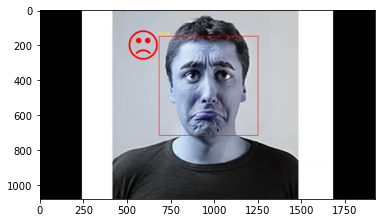

Sad
🙁


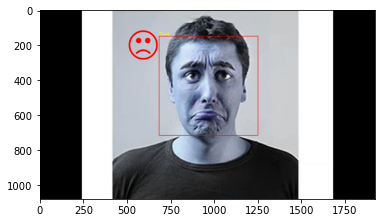

Sad
🙁


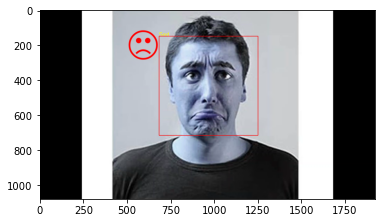

Sad
🙁


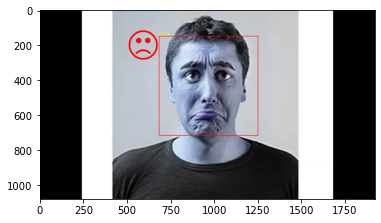

Sad
🙁


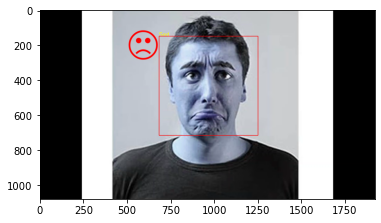

Sad
🙁


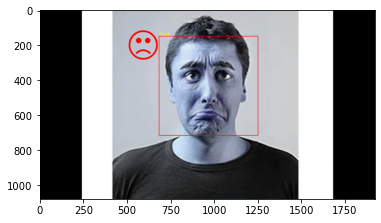

Sad
🙁


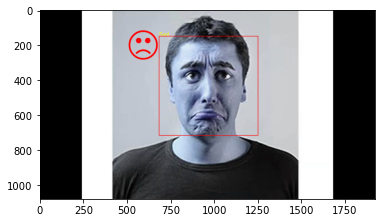

Sad
🙁


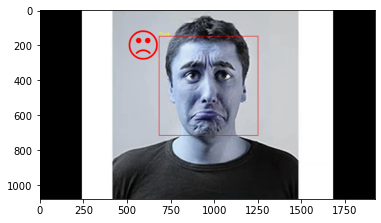

Sad
🙁


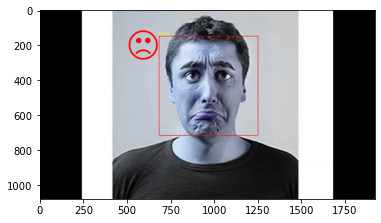

Sad
🙁


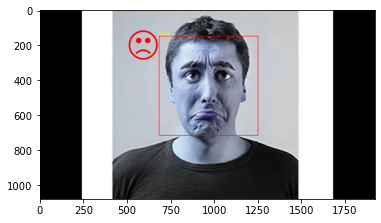

Sad
🙁


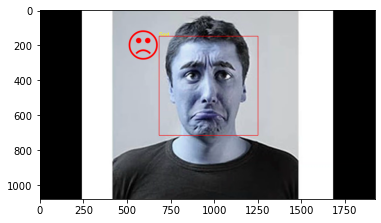

Sad
🙁


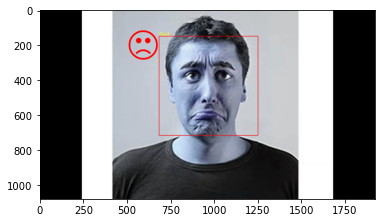

Sad
🙁


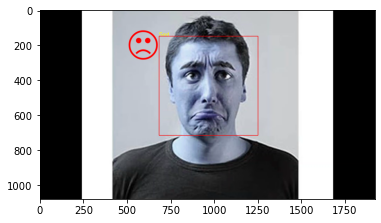

Sad
🙁


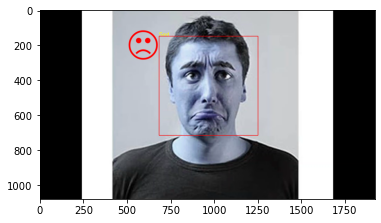

Sad
🙁


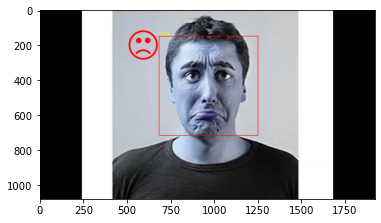

Sad
🙁


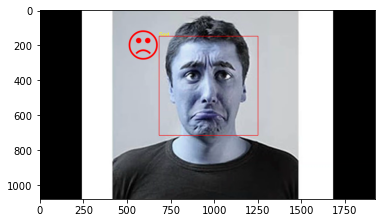

Sad
🙁


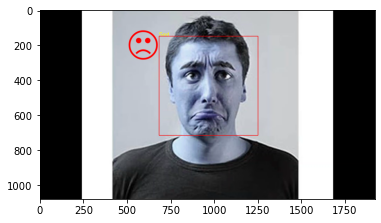

Sad
🙁


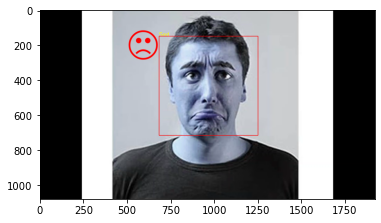

Sad
🙁


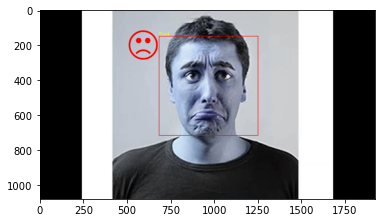

Sad
🙁


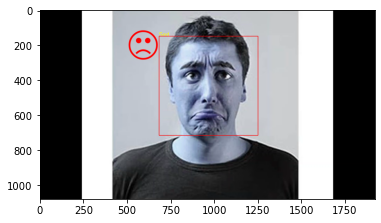

Sad
🙁


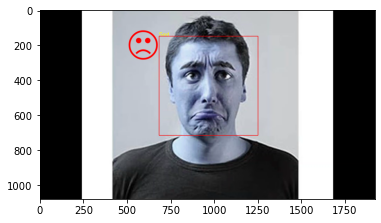

Sad
🙁


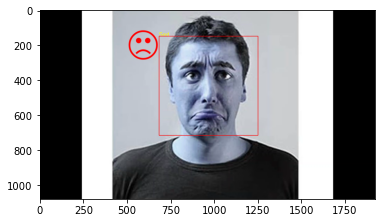

Sad
🙁


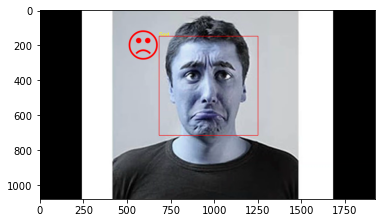

Sad
🙁


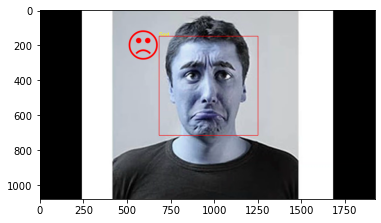

Happy
😃


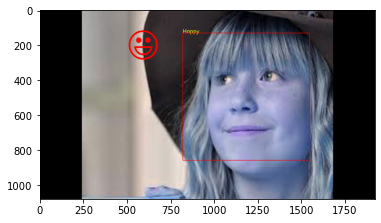

Happy
😃


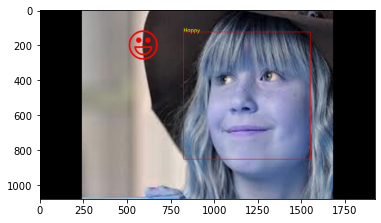

Happy
😃


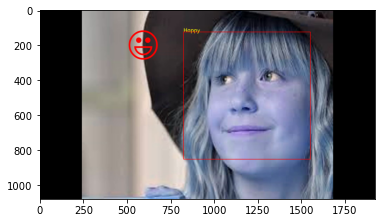

Happy
😃


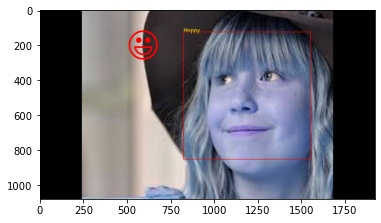

Happy
😃


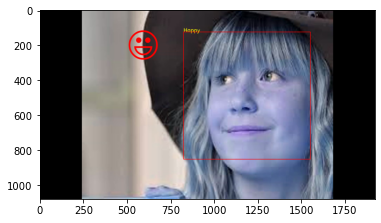

Happy
😃


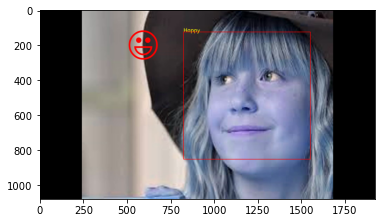

Happy
😃


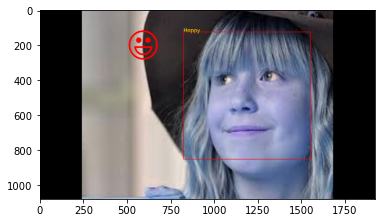

Happy
😃


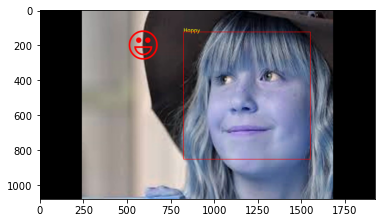

Happy
😃


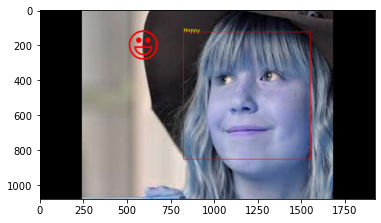

Happy
😃


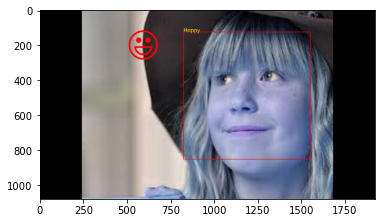

Happy
😃


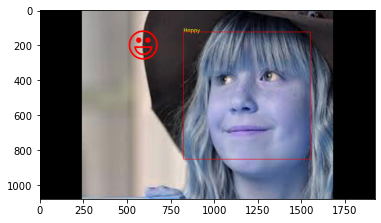

Happy
😃


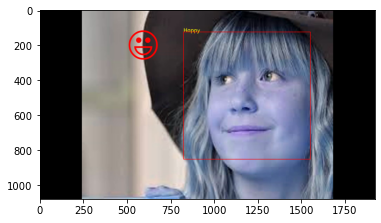

Happy
😃


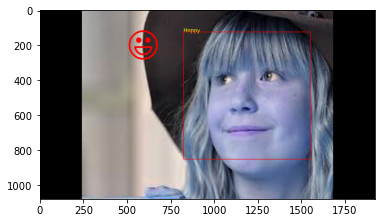

Happy
😃


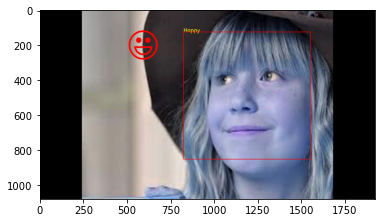

Happy
😃


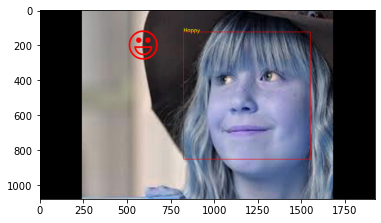

Happy
😃


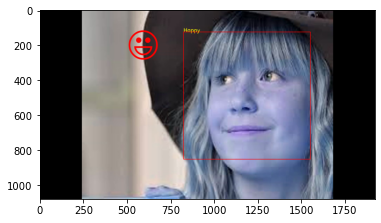

Happy
😃


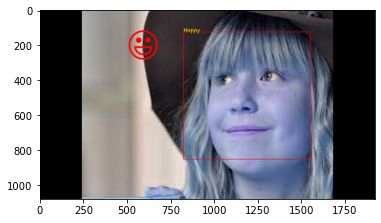

Happy
😃


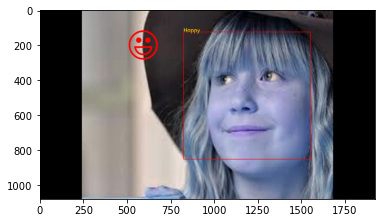

Happy
😃


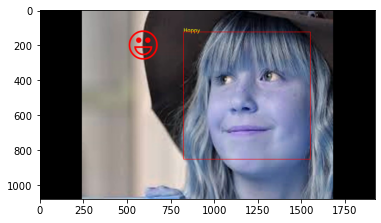

Happy
😃


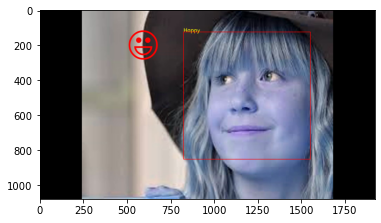

Happy
😃


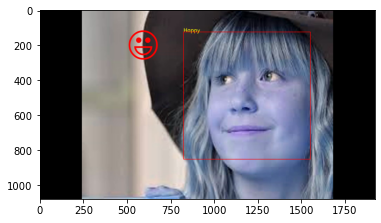

Happy
😃


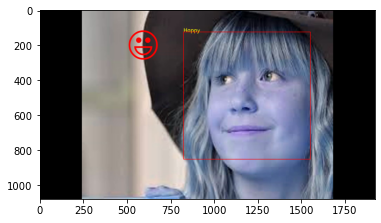

Happy
😃


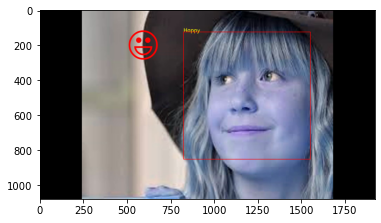

Happy
😃


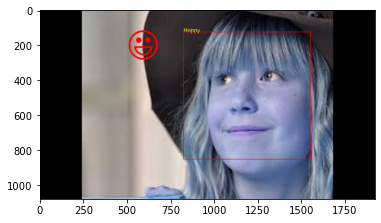

Surprised
😮


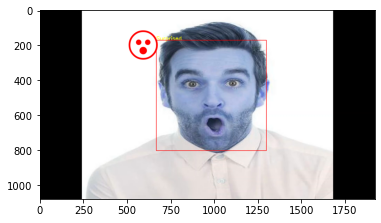

Surprised
😮


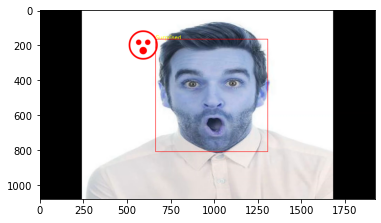

Surprised
😮


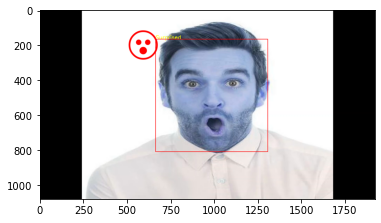

Surprised
😮


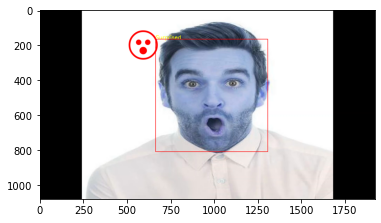

Surprised
😮


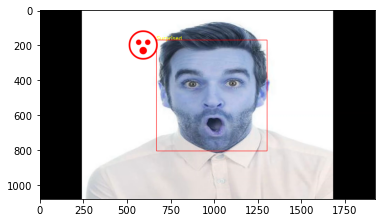

Surprised
😮


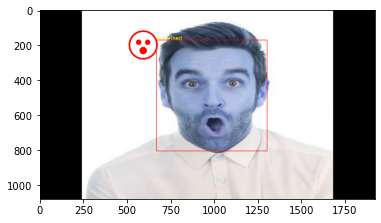

Surprised
😮


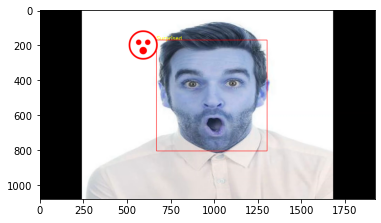

Surprised
😮


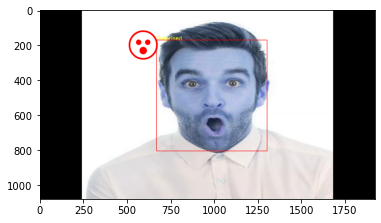

Surprised
😮


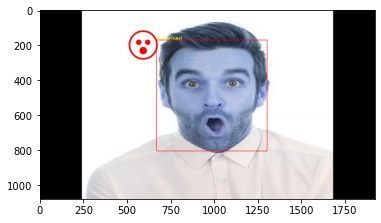

Surprised
😮


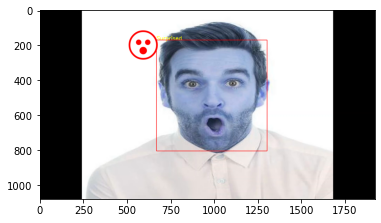

Surprised
😮


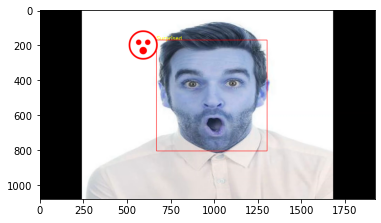

Surprised
😮


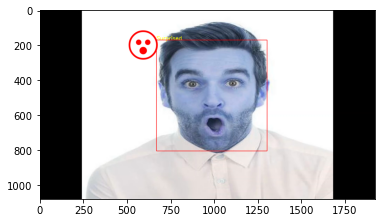

Surprised
😮


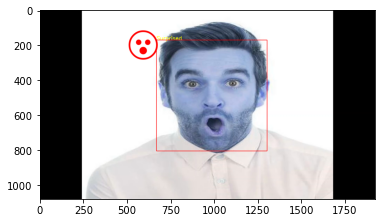

Surprised
😮


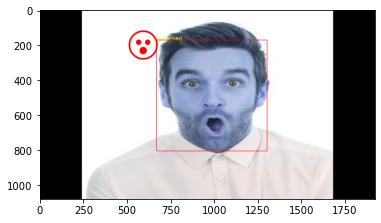

Surprised
😮


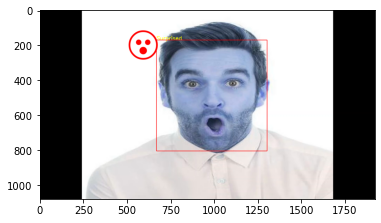

Surprised
😮


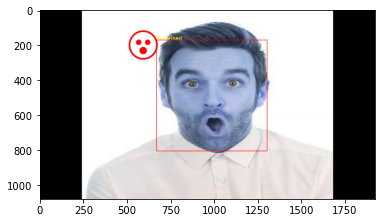

Surprised
😮


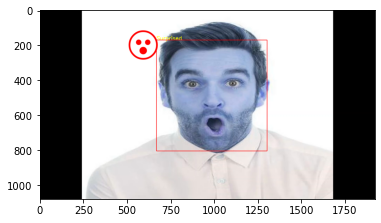

Surprised
😮


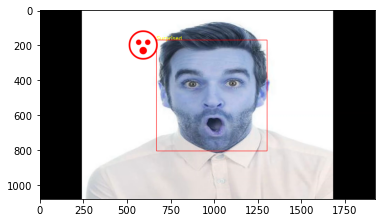

Surprised
😮


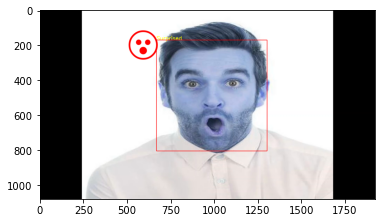

Surprised
😮


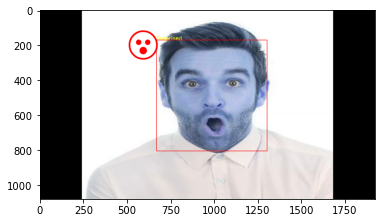

Surprised
😮


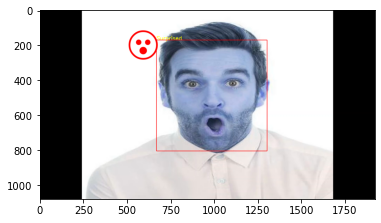

Surprised
😮


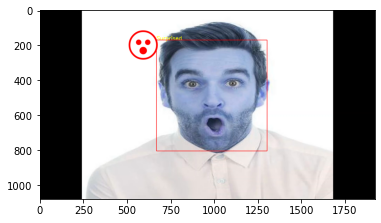

Surprised
😮


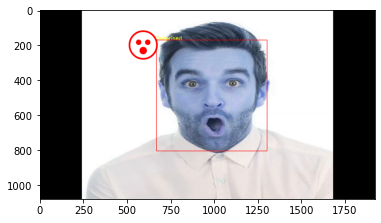

Surprised
😮


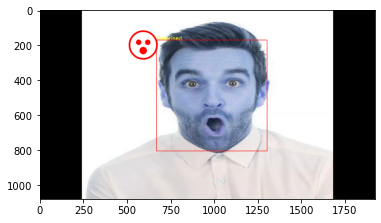

In [39]:
import matplotlib.pyplot as plt
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture('video1.mp4')
if(cap.isOpened()==False):
    print("Error in opening video stream or file")
    
img=1
count=0

while True:
    count=count+2
    count=count%10
    ret, image_np=cap.read()
    if(ret==True):
        if(count==2 or count==8 or count==4 or count==6):
            #cv2.imwrite('output/image.jpg', image_np)
            gray_fr = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
            faces = facec.detectMultiScale(gray_fr, 1.3, 5)
            for (x, y, w, h) in faces:
                fc = gray_fr[y:y+h, x:x+w]
                roi = cv2.resize(fc, (48, 48))
                img=image_np[y:y+h,x:x+w]
                cv2.imwrite('output/image.jpg', img)
                img = image.load_img('output/image.jpg', target_size = (48,48))
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis = 0)
                pred = np.argmax(model.predict(img))
                text=target_class(pred)
                print(text)
                tick=emoji(pred)
                print(tick)
                im_p = Image.fromarray(image_np)
                draw = ImageDraw.Draw(im_p)
                draw.text((500, 100),tick,font=font2, fill=font_color)
                image_np = np.array(im_p)
                cv2.putText(image_np, text, (x, y), font, 1, (255, 255, 0), 2)
                cv2.rectangle(image_np,(x,y),(x+w,y+h),(255,0,0),2)
            out_new.write(image_np)
            cv2.namedWindow("image", cv2.WINDOW_NORMAL) 
            cv2.resizeWindow("image", 500, 500) 
            cv2.imshow('image',image_np)
            plt.imshow(image_np)
            plt.show()
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
    else:
        break
        
cap.release()
out_new.release()
cv2.destroyAllWindows()

In [40]:
out_new.release()

In [41]:
from PIL import ImageColor

# using getrgb
img = ImageColor.getrgb("yellow")
print(img)


(255, 255, 0)


In [42]:
import os
acc=0
entries = os.listdir('img/Test')
for entry in entries:
    label=entry
    images=os.listdir('img/Test/'+label)
    for img in images:
        #print(img)
        path='img/Test/'+label+'/'+img
        img = image.load_img(path, target_size = (48,48))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        pred = np.argmax(model.predict(img))
        text=target_class(pred)
        #print(text)
        #print(label)
        if(text==label):
            acc=acc+1
acc=acc/9
acc=acc*100
print("Accuracy of the Model is:")
print(round(acc,2),'%')

Accuracy of the Model is:
88.89 %
